In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

data_path = r'E:\Projects\Chess\Lichess_data\stockfish\\'
all_features_path = data_path+'all_features\\top_all_features.pickle'

In [2]:
# Считываем вычисленные характеристики и разделяем
# их на тренировочную и тестовую выборки
X = pd.read_pickle(all_features_path)
X

,0,1,2,3,4,5,6,7,8,9,...,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202
0,7.0,0.0,0.0,14.0,36.0,1.0,1.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0.0,0.0,20.0,30.0,0.0,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0.0,0.0,18.0,0.0,0.0,1.0,0.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,0.0,0.0,18.0,58.0,0.0,1.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.0,0.0,12.0,19.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21537,14.0,0.0,0.0,13.0,0.0,2.0,1.0,2.0,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21538,6.0,0.0,0.0,14.0,0.0,1.0,1.0,1.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21539,9.0,0.0,0.0,12.0,0.0,1.0,1.0,2.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21540,13.0,0.0,0.0,19.0,0.0,1.0,1.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
with open(data_path+'top_data.pickle', 'rb') as f:
    data = pd.read_pickle(f)
data

,ELO_white,ELO_black,Result,ECO,Opening,UTCDate,TimeControl,Termination
0,2479.0,2481.0,1.0,B06,Modern Defense: Two Knights Variation,2014-01-15,bullet,Normal
1,2508.0,2454.0,1.0,B08,Pirc Defense: Classical Variation,2014-01-15,bullet,Normal
2,2442.0,2520.0,0.0,C11,French Defense: Steinitz Variation,2014-01-15,bullet,Time forfeit
3,2531.0,2431.0,1.0,B07,Pirc Defense #4,2014-01-15,bullet,Normal
4,2422.0,2542.0,1.0,E20,Nimzo-Indian Defense,2014-01-15,bullet,Normal
...,...,...,...,...,...,...,...,...
21537,2662.0,2762.0,0.5,C26,Vienna Game: Mieses Variation,2016-06-29,blitz,Normal
21538,2679.0,2744.0,1.0,C42,Russian Game: Three Knights Game,2016-06-29,blitz,Normal
21539,2436.0,2433.0,0.0,A15,"English Opening: Anglo-Indian Defense, King's ...",2016-06-29,blitz,Normal
21540,2454.0,2524.0,0.0,C42,Russian Game: Three Knights Game,2016-06-29,blitz,Normal


In [4]:
mean_elos = (data.ELO_white + data.ELO_black) / 2
elo_difference = data.ELO_white - data.ELO_black

In [5]:
X_train_mean, X_test_mean, Y_train_mean, Y_test_mean = train_test_split(X, mean_elos, test_size=0.2)
X_train_diff, X_test_diff, Y_train_diff, Y_test_diff = train_test_split(X, elo_difference, test_size=0.2)

<font size=6>ElasticNetCV mean and diff

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV

# Эластичная  модель с итеративной подгонкой вдоль пути регуляризации.
# Предсказываем среднее значение ELO (между белыми и черными)
elasticCV_mean_model = ElasticNetCV(max_iter=5000, n_jobs=-1)
elasticCV_mean_model.fit(X_train_mean, Y_train_mean)
elasticCV_mean_pred = elasticCV_mean_model.predict(X_test_mean)
elasticCV_mean_err = mean_absolute_percentage_error(elasticCV_mean_pred, Y_test_mean)
elasticCV_mean_err

0.029879654517480633

In [34]:
elasticCV_diff_model = ElasticNetCV(max_iter=5000, n_jobs=-1)
elasticCV_diff_model.fit(X_train_diff, Y_train_diff)
elasticCV_diff_pred = elasticCV_diff_model.predict(X_test_diff)
elasticCV_diff_err = mean_absolute_percentage_error(elasticCV_diff_pred, Y_test_diff)
elasticCV_diff_err

159.14321880560067

<font size =6>RandomForest mean and diff

In [30]:
rf_mean = RandomForestRegressor(max_depth=26, n_jobs=-1)
rf_mean.fit(X_train_mean, Y_train_mean)
rf_mean_pred = rf_mean.predict(X_test_mean)
rf_mean_err = mean_absolute_percentage_error(rf_mean_pred, Y_test_mean)
rf_mean_err

0.029850413691952026

In [9]:
rf_diff = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rf_diff.fit(X_train_diff, Y_train_diff)
rf_diff_pred = rf_diff.predict(X_test_diff)
rf_diff_err = mean_absolute_percentage_error(rf_diff_pred, Y_test_diff)
rf_diff_err

62.948971957793994

<font size=6>Градиентный бустинг

In [10]:
from sklearn.ensemble import GradientBoostingRegressor 

gbm_mean = GradientBoostingRegressor()
gbm_mean.fit(X_train_mean, Y_train_mean)
gbm_mean_pred = gbm_mean.predict(X_test_mean)
gbm_mean_err = mean_absolute_percentage_error(gbm_mean_pred, Y_test_mean)
gbm_mean_err

0.029913392356920015

In [11]:
gbm_diff = GradientBoostingRegressor()
gbm_diff.fit(X_train_diff, Y_train_diff)
gbm_diff_pred = gbm_diff.predict(X_test_diff)
gbm_diff_err = mean_absolute_percentage_error(gbm_diff_pred, Y_test_diff)
gbm_diff_err

145.6583325797955

<font size=6>AdaBoost mean and diff

In [12]:
from sklearn.ensemble import AdaBoostRegressor

ada_mean = AdaBoostRegressor(n_estimators=2)
ada_mean.fit(X_train_mean, Y_train_mean)
ada_mean_pred = ada_mean.predict(X_test_mean)
ada_mean_err = mean_absolute_percentage_error(ada_mean_pred, Y_test_mean)
ada_mean_err

0.029812595820625325

In [13]:
ada_diff = AdaBoostRegressor()
ada_diff.fit(X_train_diff, Y_train_diff)
ada_diff_pred = ada_diff.predict(X_test_diff)
ada_diff_err = mean_absolute_percentage_error(ada_diff_pred, Y_test_diff)
ada_diff_err

45.276083909670255

<font size=6>XGB Regressor mean (default)</font>

In [14]:
from xgboost import XGBRegressor
xgb_mean = XGBRegressor()
xgb_mean.fit(X_train_mean, Y_train_mean)
xgb_mean_pred = xgb_mean.predict(X_test_mean)
xgb_mean_err = mean_absolute_percentage_error(xgb_mean_pred, Y_test_mean)
xgb_mean_err

0.030570317486762415

<font size=6>XGB Regressor diff (configured)

In [15]:
xgb_diff = XGBRegressor(max_depth = 4, n_estimators = 250, learning_rate = 0.05)
xgb_diff.fit(X_train_diff, Y_train_diff)
xgb_diff_pred = xgb_diff.predict(X_test_diff)
xgb_diff_err = mean_absolute_percentage_error(xgb_diff_pred, Y_test_diff)
xgb_diff_err

128.47955804792045

<font size=6>Сравнение моделей

In [16]:
# Переводим среднее и разницу в исходные значения рейтингов белых и черных
elasticCV_white_elos = elasticCV_mean_pred + elasticCV_diff_pred / 2
elasticCV_black_elos = elasticCV_mean_pred - elasticCV_diff_pred / 2
rf_white_elos = rf_mean_pred + rf_diff_pred / 2
rf_black_elos = rf_mean_pred - rf_diff_pred / 2
gbm_white_elos = gbm_mean_pred + gbm_diff_pred / 2
gbm_black_elos = gbm_mean_pred - gbm_diff_pred / 2
ada_white_elos = ada_mean_pred + ada_diff_pred / 2
ada_black_elos = ada_mean_pred - ada_diff_pred / 2
xgb_white_elos = xgb_mean_pred + xgb_diff_pred / 2
xgb_black_elos = xgb_mean_pred - xgb_diff_pred / 2
print(elasticCV_white_elos.shape, elasticCV_black_elos.shape)

(4309,) (4309,)


In [17]:
Y_test_white = Y_test_mean.to_numpy() + Y_test_diff.to_numpy() / 2
Y_test_black = Y_test_mean.to_numpy() - Y_test_diff.to_numpy() / 2
Y_test_white.shape, Y_test_black.shape

((4309,), (4309,))

In [18]:
YY_test = np.concatenate((Y_test_white, Y_test_black), axis=0)
ELASTIC_ALL = np.concatenate((elasticCV_white_elos, elasticCV_black_elos), axis=0)
RF_ALL = np.concatenate((rf_white_elos, rf_black_elos), axis=0)
GBM_ALL = np.concatenate((gbm_white_elos, gbm_black_elos), axis=0)
ADA_ALL = np.concatenate((ada_white_elos, ada_black_elos), axis=0)

In [19]:
def pair_plot(test, pred):
    plt.plot(test, marker='.', ls='', color='orange', label='test')
    plt.plot(pred, '.b', label='pred')
    plt.show()

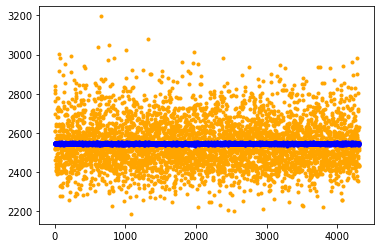

In [21]:
pair_plot(Y_test_white,elasticCV_white_elos)

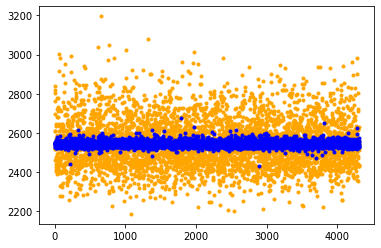

In [22]:
pair_plot(Y_test_white,rf_white_elos)

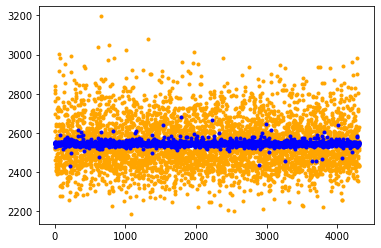

In [23]:
pair_plot(Y_test_white,gbm_white_elos)

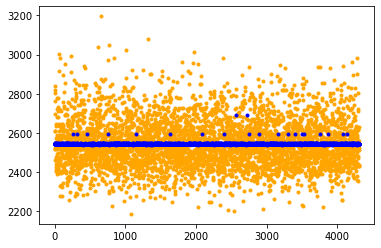

In [24]:
pair_plot(Y_test_white,ada_white_elos)

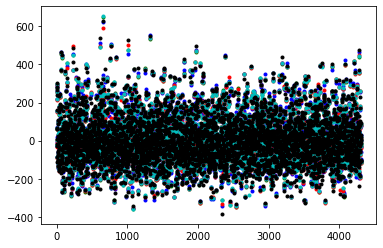

In [25]:
# Отклонения предсказанных рейтингов от тестовых значений
# Исользуются предсказания только для белых
plt.plot(Y_test_white-elasticCV_white_elos, '.g', label='ElasticNet')
plt.plot(Y_test_white-rf_white_elos, '.b', label='RandomForest')
plt.plot(Y_test_white-gbm_white_elos, '.r', label='GradientBoosting')
plt.plot(Y_test_white-ada_white_elos, '.c', label='AdaBoost')
plt.plot(Y_test_white-xgb_white_elos, marker='.', ls='', color='black', label='XGBRegressor')
plt.show()

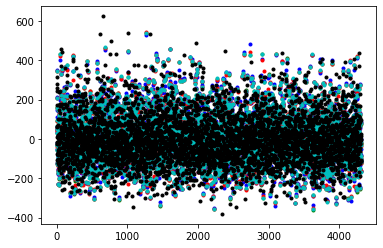

In [26]:
# Отклонения предсказанных рейтингов от тестовых значений
# Исользуются предсказания только для черных
plt.plot(Y_test_black-elasticCV_black_elos, '.g', label='ElasticNet')
plt.plot(Y_test_black-rf_black_elos, '.b', label='RandomForest')
plt.plot(Y_test_black-gbm_black_elos, '.r', label='GradientBoosting')
plt.plot(Y_test_black-ada_black_elos, '.c', label='AdaBoost')
plt.plot(Y_test_white-xgb_black_elos, marker='.', ls='', color='black', label='XGBRegressor')
plt.show()

In [27]:
def pair_plot(test, pred):
    plt.plot(test, '.r', label='test')
    plt.plot(pred, '.b', label='pred')
    plt.show()

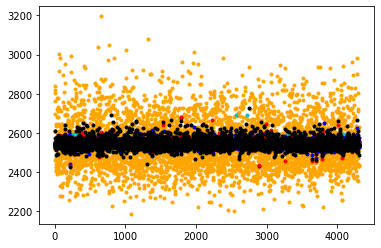

In [28]:
plt.plot(Y_test_white, marker='.', ls='', color='orange', label='Y_test_white')
plt.plot(elasticCV_white_elos, '.g', label='ElasticNet')
plt.plot(rf_white_elos, '.b', label='RandomForest')
plt.plot(gbm_white_elos, '.r', label='GradientBoosting')
plt.plot(ada_white_elos, '.c', label='AdaBoost')
plt.plot(xgb_white_elos, marker='.', ls='', color='black', label='XGBRegressor')
plt.show()

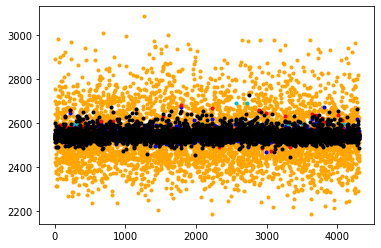

In [29]:
plt.plot(Y_test_black, marker='.', ls='', color='orange', label='Y_test_black')
plt.plot(elasticCV_black_elos, '.g', label='ElasticNet')
plt.plot(rf_black_elos, '.b', label='RandomForest')
plt.plot(gbm_black_elos, '.r', label='GradientBoosting')
plt.plot(ada_black_elos, '.c', label='AdaBoost')
plt.plot(xgb_black_elos, marker='.', ls='', color='black', label='XGBRegressor')
plt.show()